It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Note**: Due to space issues we only have a subset of this dataset.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The dataset could be found in https://www.kaggle.com/mlg-ulb/creditcardfraud

More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## If you have .tar.gz file we can directly use pandas 
#data = pd.read_csv('./datasets/creditcard.csv.tar.gz',compression='gzip', header=0, sep=',', quotechar='"')

##Code to handle column name change and extra null row that was modified/added while archiving the file 
#data.dropna(axis=0, inplace=True)
#data.rename(columns={"./creditcard.csv":"Time"}, inplace=True)

#df_union_all= pd.concat([data[data["Class"] == 1], data[data["Class"] == 0].head(90000)],ignore_index=True)
#df_union_all.to_csv("./datasets/creditcard.csv")

## If you have .csv file you cna use the code below
data = pd.read_csv('./datasets/creditcard.csv')


In [3]:
data.head(10)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
5,5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6,6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
7,7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
8,8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
9,9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [4]:
data.shape

(90492, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90492 entries, 0 to 90491
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90492 non-null  int64  
 1   Time        90492 non-null  float64
 2   V1          90492 non-null  float64
 3   V2          90492 non-null  float64
 4   V3          90492 non-null  float64
 5   V4          90492 non-null  float64
 6   V5          90492 non-null  float64
 7   V6          90492 non-null  float64
 8   V7          90492 non-null  float64
 9   V8          90492 non-null  float64
 10  V9          90492 non-null  float64
 11  V10         90492 non-null  float64
 12  V11         90492 non-null  float64
 13  V12         90492 non-null  float64
 14  V13         90492 non-null  float64
 15  V14         90492 non-null  float64
 16  V15         90492 non-null  float64
 17  V16         90492 non-null  float64
 18  V17         90492 non-null  float64
 19  V18         90492 non-nul

In [6]:
data.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,...,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000,90492.000000
mean,45245.500000,40200.629890,-0.274256,-0.029542,0.656984,0.175290,-0.284587,0.090359,-0.123797,0.050615,...,-0.027678,-0.106127,-0.037209,0.009404,0.131840,0.027117,0.001113,0.002889,98.736878,0.005437
std,26122.934617,16722.702277,1.905411,1.683004,1.438924,1.382892,1.394790,1.306035,1.323607,1.285225,...,0.778708,0.642339,0.629591,0.594041,0.441936,0.496487,0.396893,0.326256,267.024892,0.073535
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,22622.750000,32346.000000,-1.032114,-0.602024,0.176619,-0.715666,-0.899544,-0.649689,-0.604385,-0.140108,...,-0.223825,-0.526580,-0.177869,-0.322426,-0.132829,-0.325689,-0.063192,-0.005748,7.610000,0.000000
50%,45245.500000,42262.500000,-0.264227,0.074438,0.755565,0.191441,-0.314010,-0.158241,-0.071443,0.071870,...,-0.057161,-0.081941,-0.049617,0.064514,0.170764,-0.070599,0.009596,0.023242,26.970000,0.000000
75%,67868.250000,52729.000000,1.152464,0.733077,1.382588,1.044658,0.253724,0.486727,0.415684,0.356866,...,0.120441,0.310426,0.081435,0.405821,0.420096,0.305998,0.083231,0.076878,89.990000,0.000000
max,90491.000000,170348.000000,2.132386,22.057729,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [7]:
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

### Exploring the Class Column
Let us now explore a bit deeper about the data.

Let us first divide the data into features and labels.
Then we shall calculate the percentage of the fraud transaction and valid transactions in the dataset and graphically represent the same.

In [8]:
X = data.loc[:, data.columns !='Class']
y = data.loc[:, data.columns =='Class']

In [9]:
print(data['Class'].value_counts())

0.0    90000
1.0      492
Name: Class, dtype: int64


In [10]:
print('Valid Transactions: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')

print('Fraudulent Transactions: ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Valid Transactions:  99.46 % of the dataset
Fraudulent Transactions:  0.54 % of the dataset


### Visualizing the class Imbalance
Let us visualize the class-imbalance using Seaborn countplot.

Note:
sns.countplot shows the counts of observations in each categorical bin using bars.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

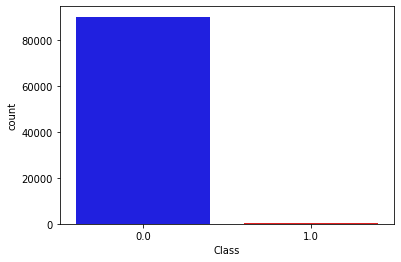

In [11]:
colors = ['blue','red']
sns.countplot('Class', data=data, palette=colors)

### Understanding Class-Imbalance
Why don't we want class imbalance?

From our analysis, we observe there is a lot of imbalance in the classes, with most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occur (0.17%) of the time in the dataframe.

Using this imbalanced data as such is not a good idea for training a model to classify if a transaction is fraudulent or not.

This is because, if this imbalanced data is used to train a model, the algorithm does not have a decent amount of fraudulent-data to learn the patterns of fraudulent transactions. Thus, it most probably assumes that every transaction is non-fraudulent(the dominant class of the data).

This would be a pity because the model naively assumes but doesn't learn/detect the patterns in order to classify.

Any solution?

Yes! To make the dataset balanced, we could either undersample or oversample it.

* Under-sampling: In undersampling, we reduce the dataset such that the number of samples of one class is to that of the other class. But this method has a trade-off with the amount of information lost in the form of the samples removed.
* Over-sampling: Next is the oversampling technique. We increase the number of total samples in the dataset by generating the synthetic samples for the minority class in order to achieve the balance between both the classes. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

What are we going to do now?
* We should do most pre-processing steps (splitting the data, normalization/standardization, etc) before under/over-sampling the data.

* This is because many sampling techniques require a simple model to be trained (e.g. SMOTE uses a k-NN algorithm to generate samples). These models have better performance on pre-processed datasets (e.g. both k-NN and k-means use euclidean distance, which requires the data to be normalized).

* So, in order for the sampling techniques to work best, we should previously perform any pre-processing steps we can. Then we shall proceed to use SMOTE technique to oversample the train data in order to use it to rain the classification algorithm.

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (63344, 31)
Transaction classes in y_train dataset:  (63344, 1)
Transactions in X_test dataset:  (27148, 31)
Transaction classes in y_test dataset:  (27148, 1)


### Feature Scaling
Since most of our data has already been scaled, we should scale the columns that are not yet scaled (Amount and Time).

We shall use StandardScaler to scale the "Amount" column and the "Time" column.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

In [15]:
X_train['normAmount'] = scaler_amount.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['normAmount'] = scaler_amount.fit_transform(X_test['Amount'].values.reshape(-1, 1))

<ipython-input-15-5a3de04d0d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['normAmount'] = scaler_amount.fit_transform(X_train['Amount'].values.reshape(-1, 1))
<ipython-input-15-5a3de04d0d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['normAmount'] = scaler_amount.fit_transform(X_test['Amount'].values.reshape(-1, 1))


In [16]:
X_train['normTime'] = scaler_time.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['normTime'] = scaler_time.fit_transform(X_test['Time'].values.reshape(-1, 1))

<ipython-input-16-ebef33494267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['normTime'] = scaler_time.fit_transform(X_train['Time'].values.reshape(-1, 1))
<ipython-input-16-ebef33494267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['normTime'] = scaler_time.fit_transform(X_test['Time'].values.reshape(-1, 1))


In [17]:
X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

In [18]:
X_train.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
78576,78576,-1.611888,1.604831,0.892883,-0.277889,-0.196199,-0.169542,0.203610,0.543886,-0.403366,...,-0.140566,-0.366186,0.111010,0.009059,-0.156815,0.069569,0.103409,0.185325,-0.326282,1.032793
49759,49759,-2.147298,0.874199,-1.213387,2.049722,-5.087207,2.392604,4.345093,-3.156590,-1.859882,...,-1.285797,0.450085,0.835461,0.636788,0.518015,-0.086983,0.402201,-0.196894,4.063732,0.231592
27105,27105,-0.830880,1.234141,0.935168,0.825235,0.135080,-0.339921,0.621183,0.157227,-0.544442,...,0.150400,0.638293,-0.096839,0.098763,-0.264627,-0.327955,0.020048,-0.071746,-0.271385,-0.356163
7135,7135,-0.858043,0.860342,0.559186,-1.678124,-0.113119,-1.216417,0.819936,-0.046745,1.952155,...,-0.004158,0.568291,-0.039758,0.495164,-0.135031,-0.922574,0.016247,-0.080976,-0.229163,-1.909565
21849,21849,0.544570,-1.367618,1.279628,1.000846,-1.840064,0.076878,-0.760118,0.306967,1.021615,...,0.403494,0.543506,-0.281595,0.561415,0.037278,0.451121,-0.037627,0.071168,0.765792,-0.508419


### Understanding SMOTE
SMOTE stands for Synthetic Minority Over-sampling Technique. SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


* Achieving Balanced Classes : Using the distances between the closest neighbors of the minority class, SMOTE creates synthetic points in between these distances in order to reach an equal balance between the minority and majority class.
* Effect: More information is retained since we don't have to delete any rows unlike in random undersampling(where we remove some data samples of majority class to achieve class balance).
* Accuracy - Time Tradeoff: More the number of data samples, more the training time which tends to increase performance. Less the number of data samples, less the information and thus less probable of decent performance.

Applying SMOTE technique
We shall apply the SMOTE technique only on train data and keep the test data untouched so as to avoid any form of data leakage.

Note:

imblearn.over_sampling.SMOTE : Class to perform over-sampling using SMOTE.

fit_sample : This method of imblearn.over_sampling.SMOTE is used to resample the dataset.

In [19]:
from imblearn.over_sampling import SMOTE


In [20]:
print("Before over-sampling:\n", y_train['Class'].value_counts )


Before over-sampling:
 <bound method IndexOpsMixin.value_counts of 78576    0.0
49759    0.0
27105    0.0
7135     0.0
21849    0.0
        ... 
21243    0.0
45891    0.0
42613    0.0
43567    0.0
68268    0.0
Name: Class, Length: 63344, dtype: float64>


In [21]:
sm = SMOTE()

In [22]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train['Class'])


In [23]:
print("After over-sampling:\n", y_train_res.value_counts())


After over-sampling:
 0.0    62995
1.0    62995
Name: Class, dtype: int64


In [24]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, auc, roc_curve 


In [25]:
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [26]:
lr = LogisticRegression()


In [27]:
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)


In [28]:
k = clf.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.99988094        nan 0.99999206        nan 0.99999206
        nan 0.99999206        nan 1.                nan 1.
        nan 1.        ]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(k.best_params_)

{'C': 10, 'penalty': 'l2'}


In [30]:
lr_gridcv_best = clf.best_estimator_

In [31]:
y_test_pre = lr_gridcv_best.predict(X_test)


In [32]:
cnf_matrix_test = confusion_matrix(y_test, y_test_pre)


In [33]:
print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))

Recall metric in the test dataset: 1.0


In [34]:
y_train_pre = lr_gridcv_best.predict(X_train_res)


In [35]:
cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

In [36]:
print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))

Recall metric in the train dataset: 1.0


In [37]:
from sklearn.metrics import plot_confusion_matrix 



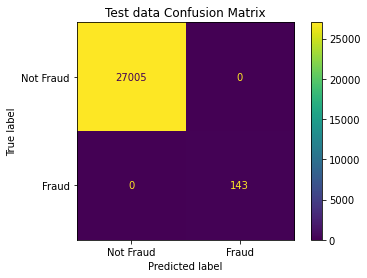

In [38]:
class_names = ['Not Fraud', 'Fraud']
plot_confusion_matrix(k, X_test, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

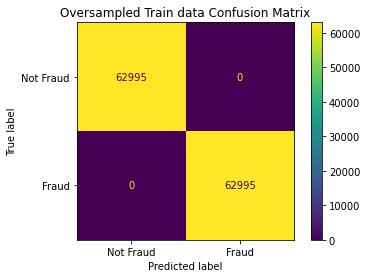

In [39]:
plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

In [40]:
y_k =  k.decision_function(X_test)

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_k)

In [42]:
roc_auc = auc(fpr, tpr)


In [43]:
print("ROC-AUC:", roc_auc)


ROC-AUC: 1.0


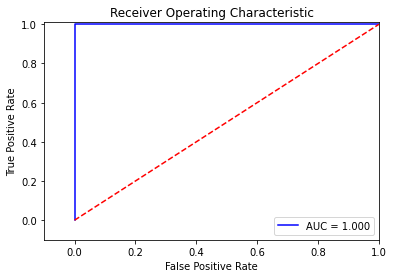

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Summary
We have been given the Europe credit-card transaction data of 2 days. For privacy reasons, the personal details have been represented in the form of Principle Components. The Amount(the transaction Amount) and Time(the seconds elapsed between each transaction and the first transaction in the dataset) are also part of the columns other than the principal components. The transactions are of valid and fraudulent types. The goal is to build a classifier to detect fraudulent transactions.

We have first loaded the data, explored it, and checked for any null values. While exploring, we found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.

It is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. We could either undersample or oversample the data to achieve a balance between the class-wise data samples.

We have split the data into train and test parts, in order to prevent any data leakage and to keep the test data untouched, before oversampling.

We have scaled the Amount and Time features using StandardScaler.

We then applied the SMOTE technique to oversample the train data and formed a new dataset with the thus obtained over-sampled datapoints.

We used the GridSearch method with different parameter values, trained logistic regression classifiers with the different combinations of these parameters, and got the best logistic regression classifier which yields the least loss on the over-sampled data-set. All this mechanism is internally implemented by GridSearchCV of sklearn.

We then used the best estimator thus obtained to evaluate its performance on the unseen test data. We calculated the recall, confusion-matrix and roc-auc scores